In [1]:
## loading important libraries
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import torchaudio
from sklearn.model_selection import train_test_split
import os
import sys
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from pydub import AudioSegment

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow2/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
# loading the autdio dataset from the directory
directory  = "/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilenceRemovedData"
data = []
for path in tqdm(os.listdir(directory)):
    # now eplore the inner folder ,
    #  path is actually the audio language
    pathHere = os.path.join(directory, path);
    count = 0;
    if not path.startswith('.'):
        for subFoldlers in os.listdir(pathHere):
            if not subFoldlers.startswith('.'):
                pathHere2 = os.path.join(pathHere,subFoldlers);
                ## Now expploring all the available audio files inside 
                ## and if not corrupted storing then in dataframe 
                for audioSamples in os.listdir(pathHere2):
                    ## extracto all req info
                    name = audioSamples.split(".")[0]
                    finalPath = os.path.join(pathHere2, audioSamples);
                    try:
                        # There are some broken files
                        s, sr = torchaudio.load(finalPath)
                        data.append({
                            'audio' : {'array': s,
                            "name": name,
                            "path": finalPath,
                            "sampling_rate": sr,
                            },
                            "language": path,
                        });
                        count = count +1;
                    except Exception as e:
                        print(str(path), e)
                        pass
        print(f'Total {count} samples loaded of {path} langueage dataset')

  8%|▊         | 1/12 [00:05<00:55,  5.09s/it]

Total 7275 samples loaded of eng langueage dataset


 17%|█▋        | 2/12 [00:12<01:01,  6.17s/it]

Total 8140 samples loaded of tel langueage dataset


 25%|██▌       | 3/12 [00:21<01:08,  7.59s/it]

Total 7832 samples loaded of mar langueage dataset


 33%|███▎      | 4/12 [00:31<01:07,  8.46s/it]

Total 8035 samples loaded of odi langueage dataset


 42%|████▏     | 5/12 [00:42<01:07,  9.58s/it]

Total 9203 samples loaded of asm langueage dataset


 50%|█████     | 6/12 [00:51<00:56,  9.36s/it]

Total 7608 samples loaded of guj langueage dataset


 58%|█████▊    | 7/12 [01:01<00:47,  9.58s/it]

Total 7877 samples loaded of hin langueage dataset


 67%|██████▋   | 8/12 [01:11<00:38,  9.69s/it]

Total 6555 samples loaded of pun langueage dataset


 75%|███████▌  | 9/12 [01:23<00:30, 10.24s/it]

Total 6353 samples loaded of tam langueage dataset


 83%|████████▎ | 10/12 [01:32<00:20, 10.08s/it]

Total 7518 samples loaded of kan langueage dataset


 92%|█████████▏| 11/12 [01:42<00:09,  9.90s/it]

Total 8246 samples loaded of mal langueage dataset


100%|██████████| 12/12 [01:55<00:00,  9.64s/it]

Total 8014 samples loaded of ben langueage dataset


In [3]:
print("Total length of the Dataset: ", len(data))

Total length of the Dataset:  92656


In [4]:
## now lets form a dataframe from the data array
df = pd.DataFrame(data)
df.head()

,audio,language
0,"{'array': [[tensor(-0.0122), tensor(-0.0189), ...",eng
1,"{'array': [[tensor(0.0020), tensor(0.0021), te...",eng
2,"{'array': [[tensor(-3.0518e-05), tensor(-3.051...",eng
3,"{'array': [[tensor(-0.0473), tensor(-0.0602), ...",eng
4,"{'array': [[tensor(0.0405), tensor(0.0290), te...",eng


In [5]:
# # Filter broken and non-existed paths

# print(f"Step 0: {len(df)}")

# df["status"] = df["audio"]["path"].apply(lambda path: True if os.path.exists(path) else None)
# df = df.dropna(subset=["audio"]["path"])
# df = df.drop("status", axis='columns')
# print(f"Step 1: {len(df)}")

# df = df.sample(frac=1)
# df = df.reset_index(drop=True)
# df.head()

In [6]:
## ecpplore dataset stats
print("Labels: ", df["language"].unique())
print()
# df.groupby("language").count()[["path"]]

Labels:  ['eng' 'tel' 'mar' 'odi' 'asm' 'guj' 'hin' 'pun' 'tam' 'kan' 'mal' 'ben']



ID Location: 32315
      Label: asm

Original sampling Rate:  8000


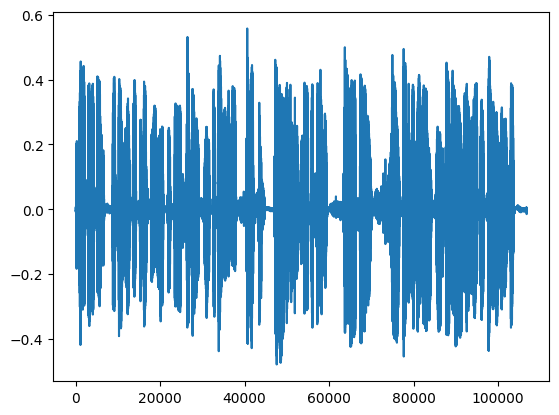

In [7]:
# np.random.seed(33)
idx = np.random.randint(0, len(df))
sample = df.iloc[idx]
path = sample["audio"]["path"]
label = sample["language"]


print(f"ID Location: {idx}")
print(f"      Label: {label}")
print()

speech, sr = torchaudio.load(path)
speech = speech[0].numpy().squeeze()
plt.plot(speech)
print("Original sampling Rate: ",sr)
# Resample the audio signal to a target sampling rate of 16,000 Hz
speech = librosa.resample(speech, orig_sr=sr, target_sr=8000)
ipd.Audio(data=np.asarray(speech), autoplay=True, rate=8000)



In [8]:
def break_audio_into_chunks(audio_path, chunk_size=1000):
    audio = AudioSegment.from_file(audio_path)
    chunk_length = chunk_size  # in milliseconds
    chunks = [audio[i:i+chunk_length] for i in range(0, len(audio), chunk_length)]
    return chunks

audio_path =  path # Replace with your audio file's path
chunks = break_audio_into_chunks(audio_path, chunk_size=1000)  # 1 second chunks

for i, chunk in enumerate(chunks):
    chunk.export(f"chunk_{i+1}.wav", format="wav")  # Export each chunk to a separate file

In [9]:
# function to check and if directory does not exists create one
def CreateIfNot(parent, path):
    if path not in os.listdir(parent):
        os.mkdir(os.path.join(parent,path))
    return os.path.join(parent,path)

In [13]:
# loading the autdio dataset from the directory
directory  = "/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilenceRemovedData"
root = "/Users/yash/Desktop/MTP-2k23-24"
newDirectory = "resampled_data_SilencedAndOneSecondData"
if newDirectory not in os.listdir(root):
    # check if directory exist
    CreateIfNot(root, newDirectory)
    newDirectory = f'/Users/yash/Desktop/MTP-2k23-24/{newDirectory}'
    data = []
    for path in tqdm(os.listdir(directory)):
        # now eplore the inner folder ,
        #  path is actually the audio language
        pathHere = os.path.join(directory, path);
        # create new path 
        NewPathHere = CreateIfNot(newDirectory, path);
        print(NewPathHere)
        count = 0;
        if not path.startswith('.'):
            for subFoldlers in os.listdir(pathHere):
                if not subFoldlers.startswith('.'):
                    pathHere2 = os.path.join(pathHere,subFoldlers);
                    NewPathHere2 = CreateIfNot(NewPathHere, subFoldlers);
                    ## Now expploring all the available audio files inside 
                    ## and if not corrupted storing then in dataframe 
                    for audioSamples in os.listdir(pathHere2):
                        ## extracto all req info
                        # name = audioSamples.split(".")[0]
                        finalPath = os.path.join(pathHere2, audioSamples);
                        AudioPath = os.path.join(NewPathHere2, audioSamples);
                        try:
                            # Try if there are some broken files
                            speech, sr = torchaudio.load(finalPath)
                            ## break the audio into chunks of 1sec and save them again to disk
                            chunks = break_audio_into_chunks(finalPath, chunk_size=1000)  # 1 second chunks
                            f = audioSamples.split(".")[0]
                            for i, chunk in enumerate(chunks):
                                chunk.export(f"{NewPathHere2}/{f}_{i+1}.wav", format="wav")  # Export each chunk to a separate file
                            count = count +1;
                        except Exception as e:
                            print(str(path), e)
                            pass
            print(f'Total {count} samples loaded and saved after silence removal and 1sec duration each of {path} language dataset')

  0%|          | 0/12 [00:00<?, ?it/s]

/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/eng


  8%|▊         | 1/12 [00:15<02:47, 15.25s/it]

Total 7275 samples loaded and saved after silence removal and 1sec duration each of eng language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/tel


 17%|█▋        | 2/12 [00:31<02:37, 15.72s/it]

Total 8140 samples loaded and saved after silence removal and 1sec duration each of tel language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/mar


 25%|██▌       | 3/12 [00:48<02:26, 16.26s/it]

Total 7832 samples loaded and saved after silence removal and 1sec duration each of mar language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/odi


 33%|███▎      | 4/12 [01:04<02:10, 16.37s/it]

Total 8035 samples loaded and saved after silence removal and 1sec duration each of odi language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/asm


 42%|████▏     | 5/12 [01:22<01:59, 17.05s/it]

Total 9203 samples loaded and saved after silence removal and 1sec duration each of asm language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/guj


 50%|█████     | 6/12 [01:39<01:40, 16.71s/it]

Total 7608 samples loaded and saved after silence removal and 1sec duration each of guj language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/hin


 58%|█████▊    | 7/12 [01:57<01:25, 17.18s/it]

Total 7877 samples loaded and saved after silence removal and 1sec duration each of hin language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/pun


 67%|██████▋   | 8/12 [02:14<01:08, 17.10s/it]

Total 6555 samples loaded and saved after silence removal and 1sec duration each of pun language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/tam


 75%|███████▌  | 9/12 [02:30<00:50, 16.89s/it]

Total 6353 samples loaded and saved after silence removal and 1sec duration each of tam language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/kan


 83%|████████▎ | 10/12 [02:47<00:33, 16.77s/it]

Total 7518 samples loaded and saved after silence removal and 1sec duration each of kan language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/mal


 92%|█████████▏| 11/12 [03:03<00:16, 16.58s/it]

Total 8246 samples loaded and saved after silence removal and 1sec duration each of mal language dataset
/Users/yash/Desktop/MTP-2k23-24/resampled_data_SilencedAndOneSecondData/ben


100%|██████████| 12/12 [03:18<00:00, 16.55s/it]

Total 8014 samples loaded and saved after silence removal and 1sec duration each of ben language dataset


In [16]:
# loading the autdio dataset from the directory
directory  = "/Users/yash/Desktop/MTP-2k23-24/TTS_data_SilenceRemovedData"
root = "/Users/yash/Desktop/MTP-2k23-24"
newDirectory = "TTS_data_SilencedAndOneSecondData"
if newDirectory not in os.listdir(root):
    # check if directory exist
    CreateIfNot(root, newDirectory)
    newDirectory = f'/Users/yash/Desktop/MTP-2k23-24/{newDirectory}'
    data = []
    for path in tqdm(os.listdir(directory)):
        # now eplore the inner folder ,
        #  path is actually the audio language
        pathHere = os.path.join(directory, path);
        # create new path 
        NewPathHere = CreateIfNot(newDirectory, path);
        count = 0;
        if not path.startswith('.'):
            for audioFile in os.listdir(pathHere):
                if not audioFile.startswith('.'):
                    ## Now expploring all the available audio files inside 
                    ## and if not corrupted storing then in dataframe 
                    ## extracto all req info
                    # name = audioSamples.split(".")[0]
                    finalPath = os.path.join(pathHere,audioFile)
                    destinationPath = os.path.join(NewPathHere,audioFile)
                    try:
                        # Try if there are some broken files
                        speech, sr = torchaudio.load(finalPath)
                        ## break the audio into chunks of 1sec and save them again to disk
                        chunks = break_audio_into_chunks(finalPath, chunk_size=1000)  # 1 second chunks
                        f = audioSamples.split(".")[0]
                        for i, chunk in enumerate(chunks):
                            chunk.export(f"{NewPathHere}/{f}_{i+1}.wav", format="wav")  # Export each chunk to a separate file
                        count = count +1;
                    except Exception as e:
                        print(str(path), e)
            print(f'Total {count} samples loaded and saved after silence removal and 1sec duration each of {path} language dataset')

  9%|▉         | 1/11 [00:01<00:19,  1.94s/it]

Total 200 samples loaded and saved after silence removal and 1sec duration each of eng language dataset


 18%|█▊        | 2/11 [00:03<00:14,  1.62s/it]

Total 100 samples loaded and saved after silence removal and 1sec duration each of tel language dataset


 27%|██▋       | 3/11 [00:03<00:09,  1.14s/it]

Total 100 samples loaded and saved after silence removal and 1sec duration each of mar language dataset


 36%|███▋      | 4/11 [00:04<00:06,  1.12it/s]

Total 100 samples loaded and saved after silence removal and 1sec duration each of odi language dataset


 45%|████▌     | 5/11 [00:04<00:04,  1.40it/s]

Total 100 samples loaded and saved after silence removal and 1sec duration each of asm language dataset


 55%|█████▍    | 6/11 [00:05<00:03,  1.36it/s]

Total 100 samples loaded and saved after silence removal and 1sec duration each of guj language dataset


 64%|██████▎   | 7/11 [00:07<00:04,  1.02s/it]

Total 100 samples loaded and saved after silence removal and 1sec duration each of hin language dataset


 73%|███████▎  | 8/11 [00:08<00:03,  1.11s/it]

Total 100 samples loaded and saved after silence removal and 1sec duration each of tam language dataset


 82%|████████▏ | 9/11 [00:09<00:02,  1.06s/it]

Total 100 samples loaded and saved after silence removal and 1sec duration each of kan language dataset


 91%|█████████ | 10/11 [00:10<00:00,  1.08it/s]

Total 100 samples loaded and saved after silence removal and 1sec duration each of mal language dataset


100%|██████████| 11/11 [00:10<00:00,  1.05it/s]

Total 100 samples loaded and saved after silence removal and 1sec duration each of ben language dataset
